<a href="https://colab.research.google.com/github/aiformankind/gun-detection/blob/main/Gun_Rifle_Detection_YOLOv5_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Kids* should be safe when going to schools. AI For Mankind wants to build and deploy gun detection system to local schools in California.

In this notebook, AI For Mankind built a gun and rifle detection model using Yolov5 (You Only Look Once).

Please feel free to improve the notebook and contribute it back. 
Repo: https://github.com/aiformankind/gun-detection


Learn more about [AI For Mankind](https://aiformankind.org/).

For more information about Ultralytics Yolov5 please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

Learning Resources
1. [Yolo Object Detection (Part 1)](https://youtu.be/2hAiJe8ITsE)

# Setup

First we will download the gun detection train dataset. 

AI For Mankind combines the following datasets into the above one consolidated train dataset.

1.   [Hand, gun and phone dataset](https://www.researchgate.net/profile/Cuauhtemoc-Suarez-Ramirez-3/publication/356339851_TYolov5_A_Temporal_Yolov5_Detector_Based_on_Quasi-Recurrent_Neural_Networks_for_Real-Time_Handgun_Detection_in_Video) prepared by  
Mario Alberto Duran-Vega, 
Miguel Gonzalez-Mendoza, 
Leonardo Chang, 
Cuauhtemoc Suarez-Ramirez, the authors of [TYolov5: A Temporal Yolov5 Detector Based on Quasi-Recurrent Neural Networks for Real-Time Handgun Detection in Video](https://www.researchgate.net/publication/356339851_TYolov5_A_Temporal_Yolov5_Detector_Based_on_Quasi-Recurrent_Neural_Networks_for_Real-Time_Handgun_Detection_in_Video)


2.   [Rifle, gun and fire dataset](https://www.kaggle.com/datasets/atulyakumar98/fire-and-gun-dataset) prepared by Atulya Kumar



Next, mount your Google Drive so that we can save trained model to Google Drive.

Note: We will continue to add more images to the train dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Your google drive is mapped as ("/content/drive/MyDrive")

In [2]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download gun detection training dataset

In [3]:
import gdown

# Download the train images
url = "https://drive.google.com/uc?id=1zFf0GhWEKcDQgRO1LzUjAbZNFTqlImHY"
output = "fire_gun_rifle_v1.zip"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zFf0GhWEKcDQgRO1LzUjAbZNFTqlImHY
To: /content/fire_gun_rifle_v1.zip
100%|██████████| 1.92G/1.92G [00:06<00:00, 289MB/s]


'fire_gun_rifle_v1.zip'

In [4]:
!ls 


drive  fire_gun_rifle_v1  fire_gun_rifle_v1.zip  __MACOSX  sample_data	yolov5


Unzip the train dataset, fire_gun_rifle_v1.zip

In [5]:
!rm -Rf __MACOSX

In [6]:
!rm -Rf fire_gun_rifle_v1

In [8]:
!rm -Rf yolov5

In [ ]:
!unzip fire_gun_rifle_v1.zip

In [10]:
!rm -rf __MACOSX/*

There are two directories train and val after unzip.

In [11]:
!ls fire_gun_rifle_v1/

train  val


In this dataset, we use the following labels.

Label 0 for gun

Label 1 for fire

Label 2 for rifle

Clone yolov5 repo, install dependencies and check PyTorch and GPU.

In [12]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.12.1+cu113 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [13]:
!ls /content/fire_gun_rifle_v1

train  val


Next we will copy the dataset to this /content/yolov5/fire_gun_rifle directory for training

In [14]:
!mkdir /content/yolov5/fire_gun_rifle

In [15]:
!cp -r /content/fire_gun_rifle_v1/* /content/yolov5/fire_gun_rifle/

In [16]:
!ls /content/yolov5/fire_gun_rifle/

train  val


Next we will download the data and model architecture configs (data_rifle.yaml + yolov5m_rifle.yaml).

In data_rifle.yaml, we specify the train, val test folders and nc is the number of classes.


![picture](https://drive.google.com/uc?export=view&id=1I__wOZFcDOOnklYPwWt-CZENPNV3UGbl)

There are several YOLOv5 model architectures: YOLOv5n (nano), YOLOv5s (small), YOLOv5m (medium), YOLOv5l (large), YOLOv5x (extra large). 

The model architecture configs provided by us have been updated to reflect the number of classes we want to detect. See below, nc: 3

![picture](https://drive.google.com/uc?export=view&id=1eelOPk5fR6QlspAENPrM6LKTVMj2SQ52)

In [17]:
import gdown

# Download dataset and model config files
url = "https://drive.google.com/drive/folders/1UxqJ2y7Y3CNNJKPGyYhOTnY34svwHTD2"
output = "fire_gun_rifle_config"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/yolov5/fire_gun_rifle_config/data_rifle_1.yaml',
 '/content/yolov5/fire_gun_rifle_config/data_rifle.yaml',
 '/content/yolov5/fire_gun_rifle_config/test_data_rifle.yaml',
 '/content/yolov5/fire_gun_rifle_config/yolov5l_rifle.yaml',
 '/content/yolov5/fire_gun_rifle_config/yolov5m_rifle.yaml']

In [18]:
!ls /content/yolov5/fire_gun_rifle_config

data_rifle_1.yaml  test_data_rifle.yaml  yolov5m_rifle.yaml
data_rifle.yaml    yolov5l_rifle.yaml


Start the training. You want to train up to at least 50 epochs to have decent results.

This training takes at least 9 hours for 100 epochs.

We specify --weights=yolo5m.pt to use the pretrained yolov5 model architecture of medium size.

In [20]:
%pip install -q wandb
 

     |████████████████████████████████| 1.8 MB 7.6 MB/s 
     |████████████████████████████████| 162 kB 65.9 MB/s 
     |████████████████████████████████| 181 kB 70.6 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 158 kB 89.4 MB/s 
     |████████████████████████████████| 157 kB 85.8 MB/s 
     |████████████████████████████████| 157 kB 96.1 MB/s 
     |████████████████████████████████| 157 kB 79.7 MB/s 
     |████████████████████████████████| 157 kB 98.2 MB/s 
     |████████████████████████████████| 157 kB 65.0 MB/s 
     |████████████████████████████████| 157 kB 90.7 MB/s 
     |████████████████████████████████| 157 kB 77.1 MB/s 
     |████████████████████████████████| 156 kB 82.4 MB/s 


Enable metrics logging using Weights & Biases.

[Weights & Biases](https://wandb.ai) (W&B) is integrated with YOLOv5 for real-time visualization and cloud logging of training runs.

Signup for a free account [Weights & Biases](https://wandb.ai) 

In [21]:
 import wandb
 wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [22]:
!python train.py  --batch 8 --epochs 60 --weights=yolov5m.pt \
    --data /content/yolov5/fire_gun_rifle_config/data_rifle.yaml --cfg /content/yolov5/fire_gun_rifle_config/yolov5m_rifle.yaml --cache

wandb: Currently logged in as: aiformankind. Use `wandb login --relogin` to force relogin
train: weights=yolov5m.pt, cfg=/content/yolov5/fire_gun_rifle_config/yolov5m_rifle.yaml, data=/content/yolov5/fire_gun_rifle_config/data_rifle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/ultralytics/yolov5
   c

Training results are saved to runs/train/ with incrementing run directories, eg. runs/train/exp, runs/train/exp2. 

You can find out the right run directory from the output printout and you can then save the trained model's weights from the run directory to Google Drive. 


In [23]:
! ls runs/train/exp2/weights/

best.pt  last.pt


Save the trained model's weight to Google Drive.

In [24]:
!cp runs/train/exp2/weights/best.pt /content/drive/MyDrive/fire_gun_rifle/gun-detection-model-medium-60epochs.pt

Examine the training metrics

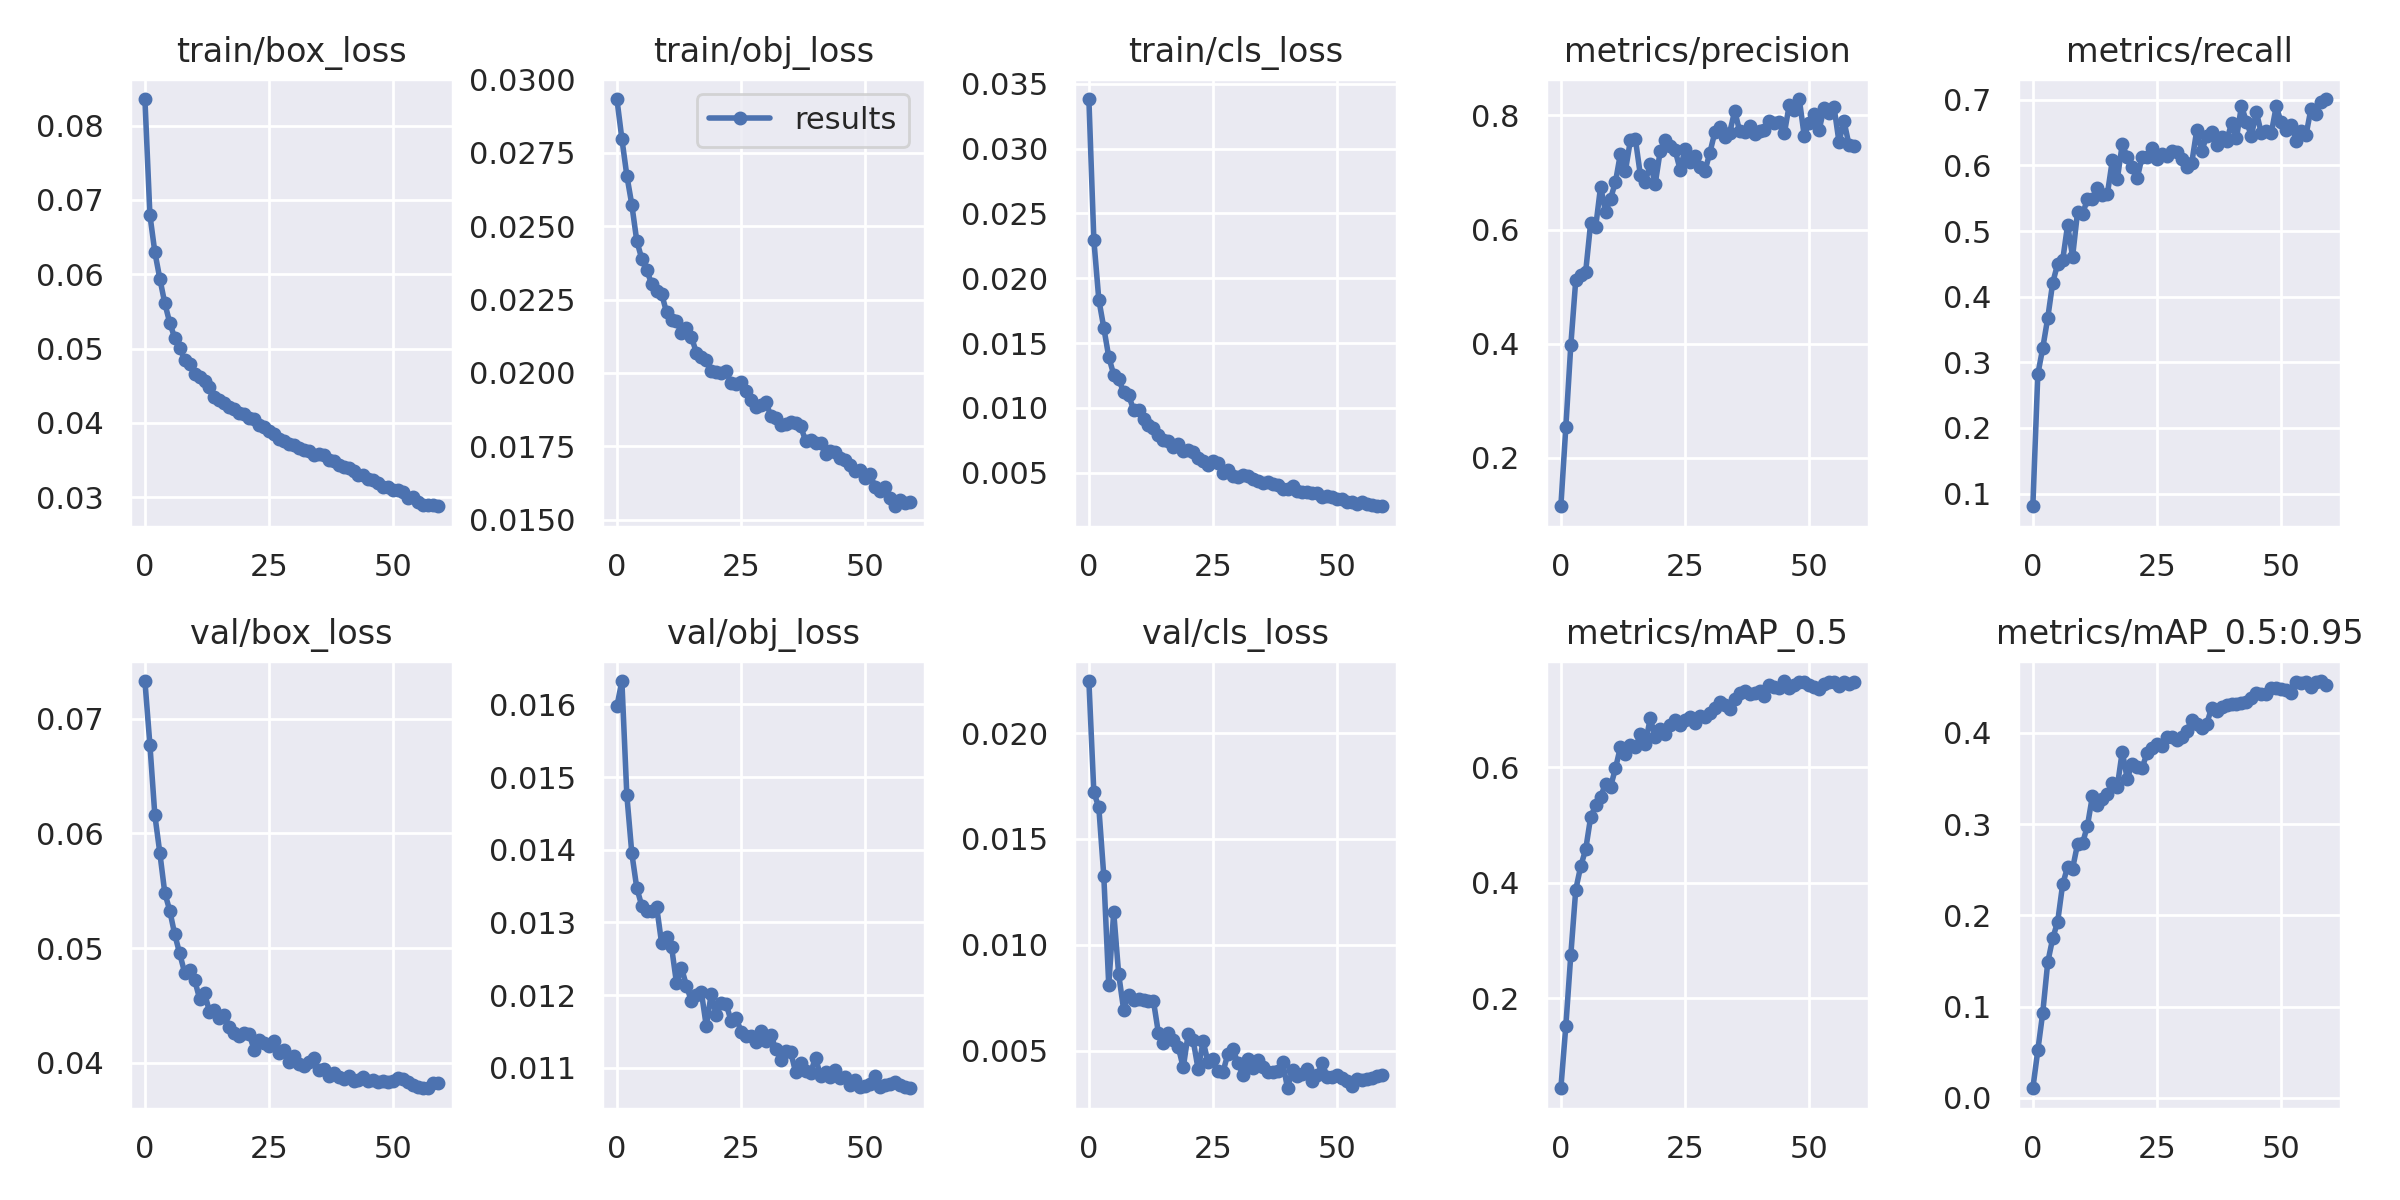

In [49]:
Image(filename="runs/train/exp2/results.png")

Perform inference using the trained model. 

In this example, we specify to use the model weights that we saved in Google Drive. (eg. --weights 'PATH_TO_SAVED_MODEL_IN_GOOGLE_DRIVE')

In [28]:
!python detect.py --source /content/fire_gun_rifle_v1/val --weights '/content/drive/MyDrive/fire_gun_rifle/gun-detection-model-medium-60epochs.pt' --conf 0.5 --save-txt

detect: weights=['/content/drive/MyDrive/fire_gun_rifle/gun-detection-model-medium-60epochs.pt'], source=/content/fire_gun_rifle_v1/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-181-g8a19437 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5m_rifle summary: 242 layers, 21476712 parameters, 0 gradients
image 1/500 /content/fire_gun_rifle_v1/val/00d1e939c70f17f0.jpg: 448x640 1 gun, 14.0ms
image 2/500 /content/fire_gun_rifle_v1/val/0113a550eac4f838d.jpg: 352x640 1 rifle, 13.5ms
image 3/500 /content/fire_gun_rifle_v1/val/01176ab5350931416.jpg: 448x640 1 rifle, 10.4ms
image 4/500 /con

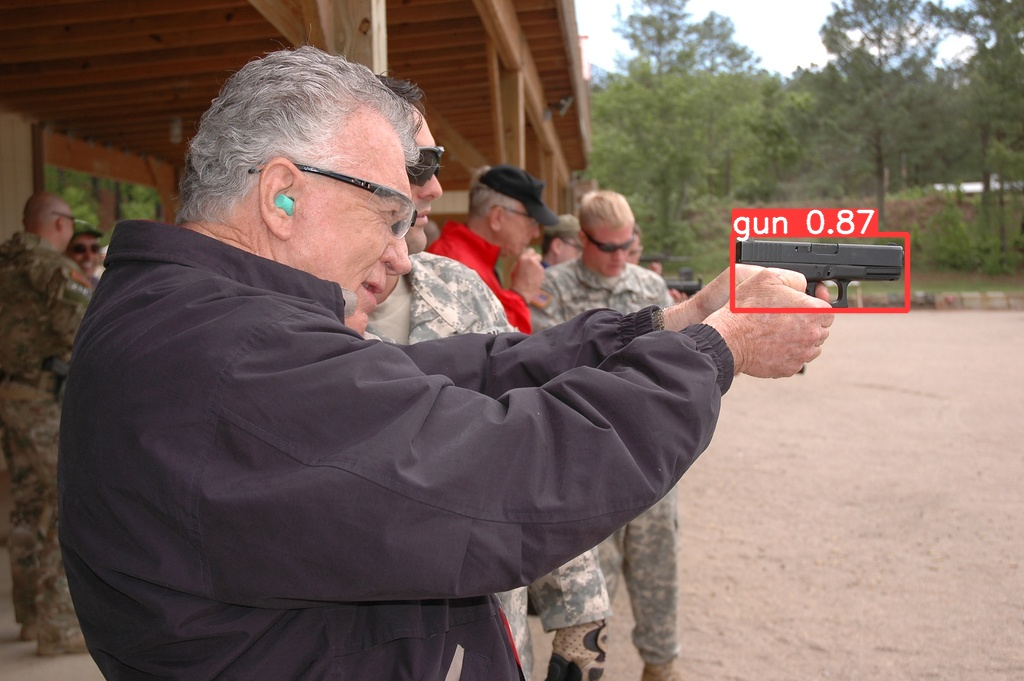

In [31]:
Image(filename="runs/detect/exp/1197aaf18b6f41f51.jpg", width=600)

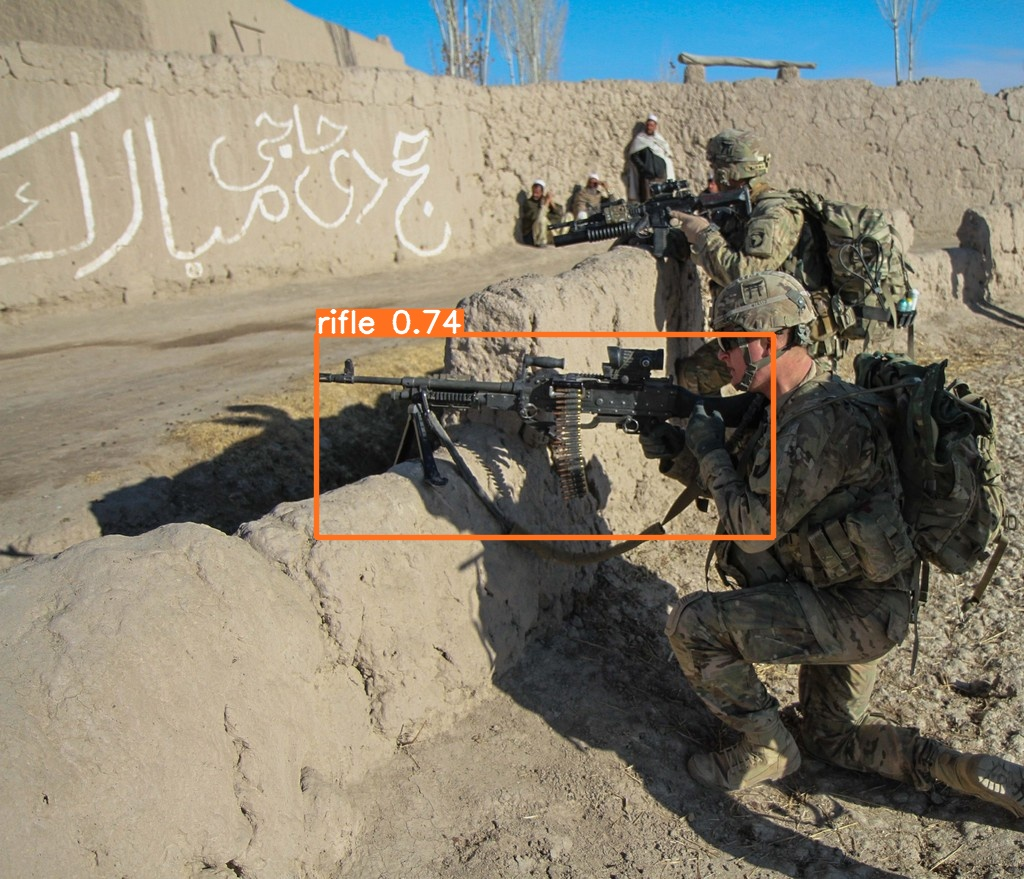

In [32]:
Image(filename="runs/detect/exp/313f4cb2943116269.jpg", width=600)

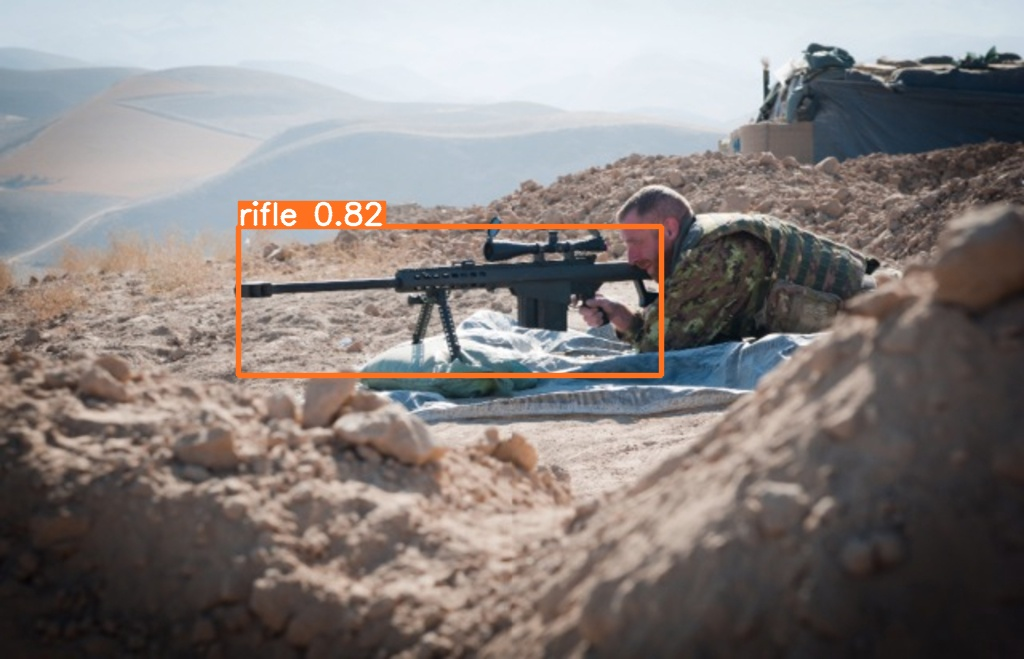

In [33]:
Image(filename="runs/detect/exp/71f48d203a4fe0841.jpg", width=600)

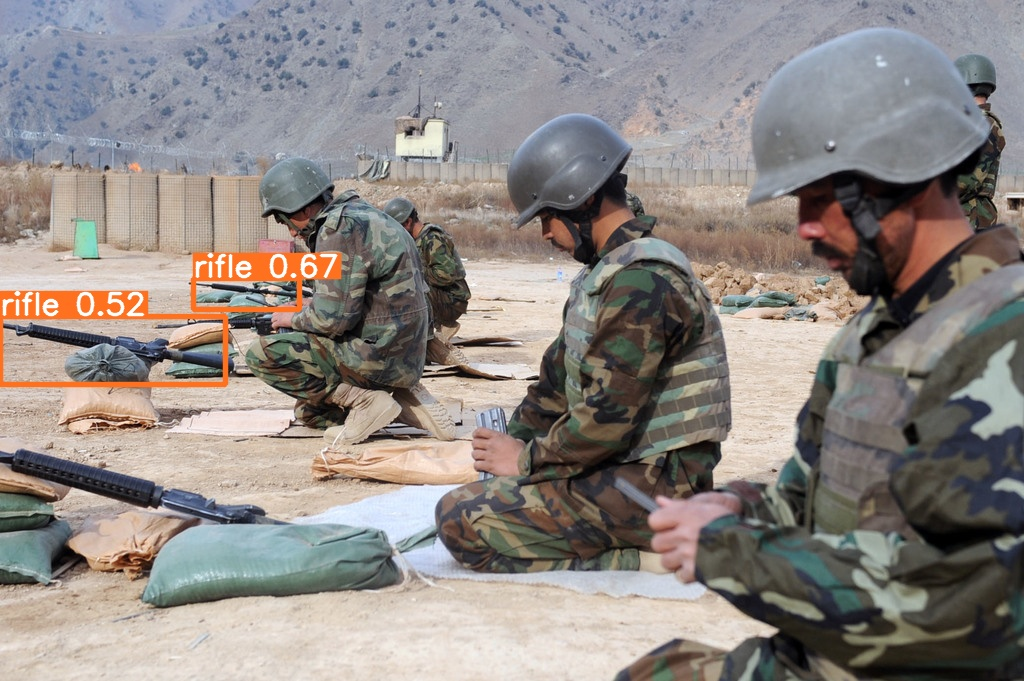

In [34]:
Image(filename="runs/detect/exp/b192087a934360927.jpg", width=600)

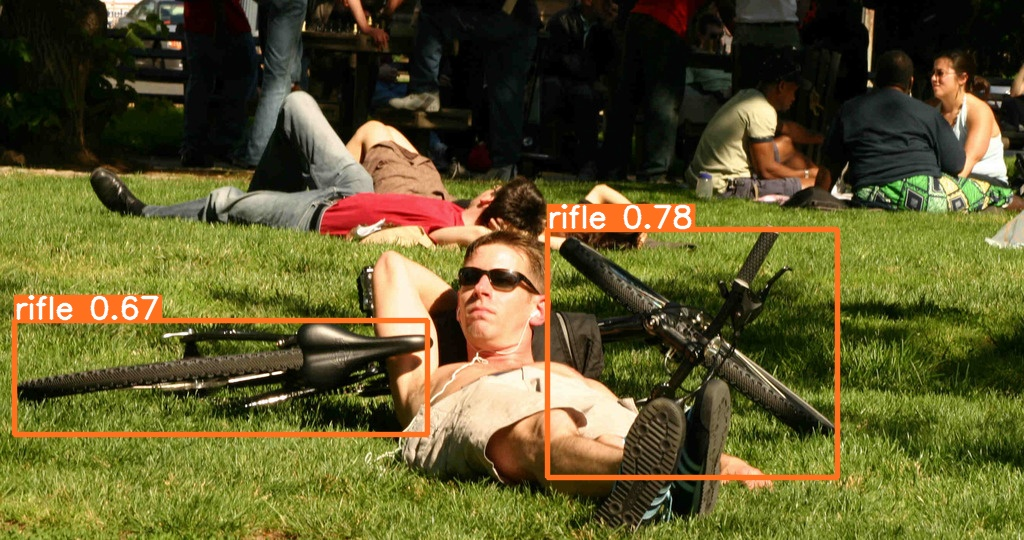

In [37]:
Image(filename="runs/detect/exp/51df3623220861847.jpg", width=600)

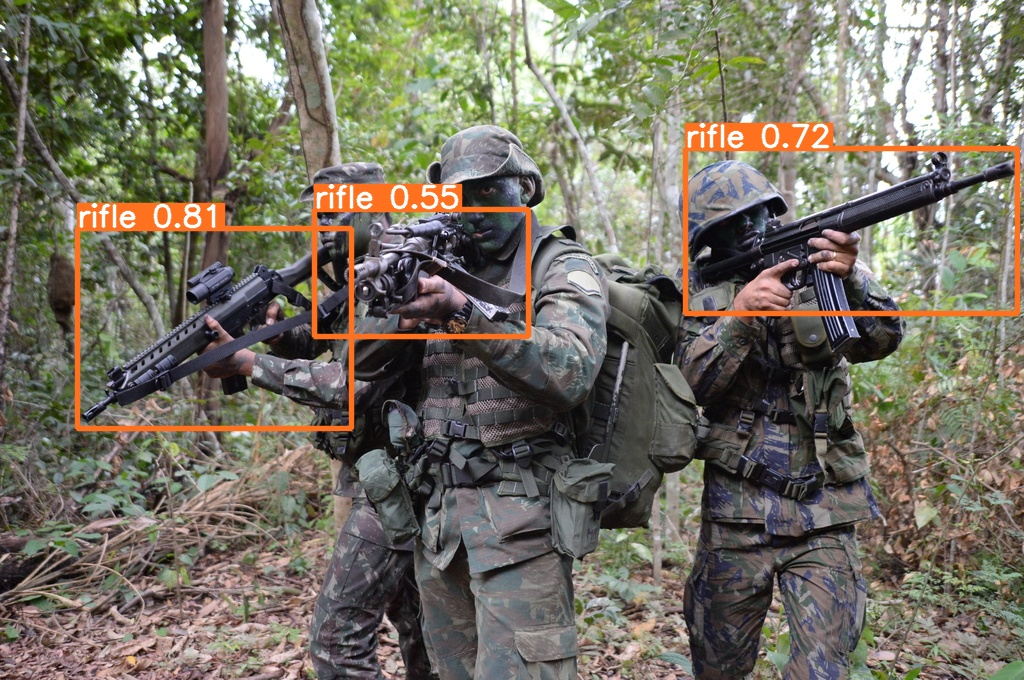

In [39]:
Image(filename="runs/detect/exp/31ec1d977643fa9b1.jpg", width=600)

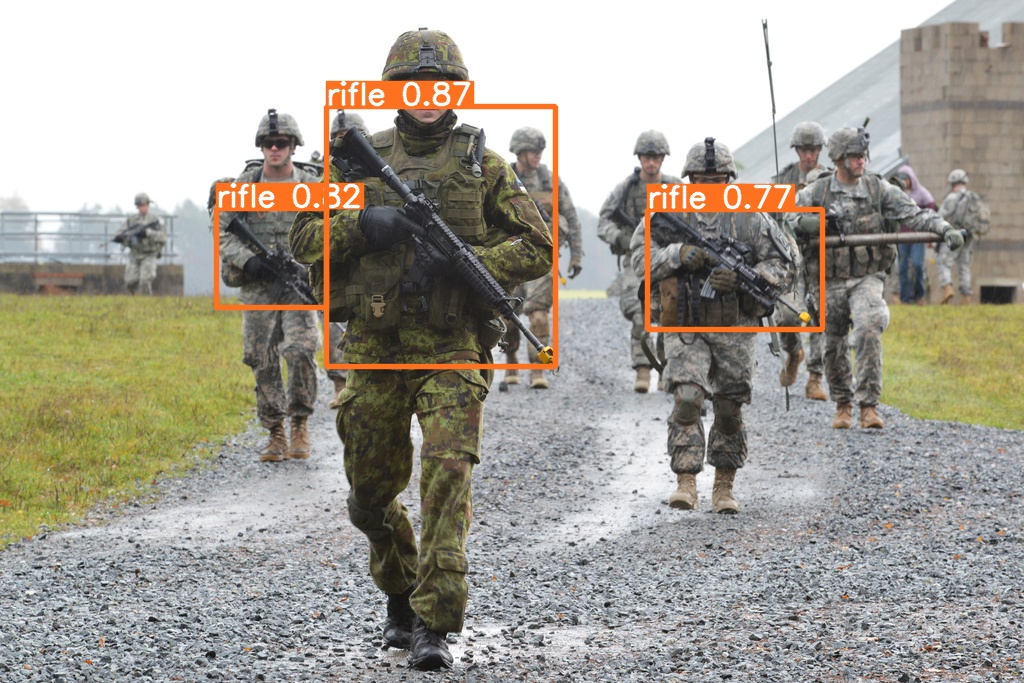

In [40]:
Image(filename="runs/detect/exp/1195be2c26d182780.jpg", width=600)

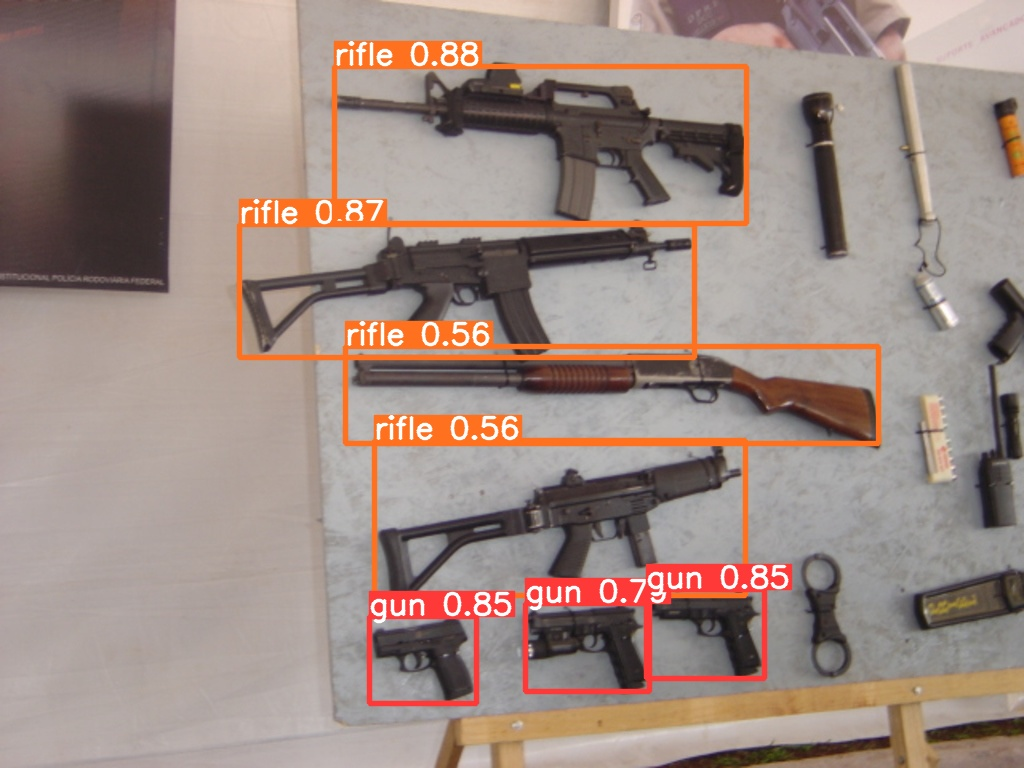

In [41]:
Image(filename="runs/detect/exp/0141ec0633447b467.jpg", width=600)

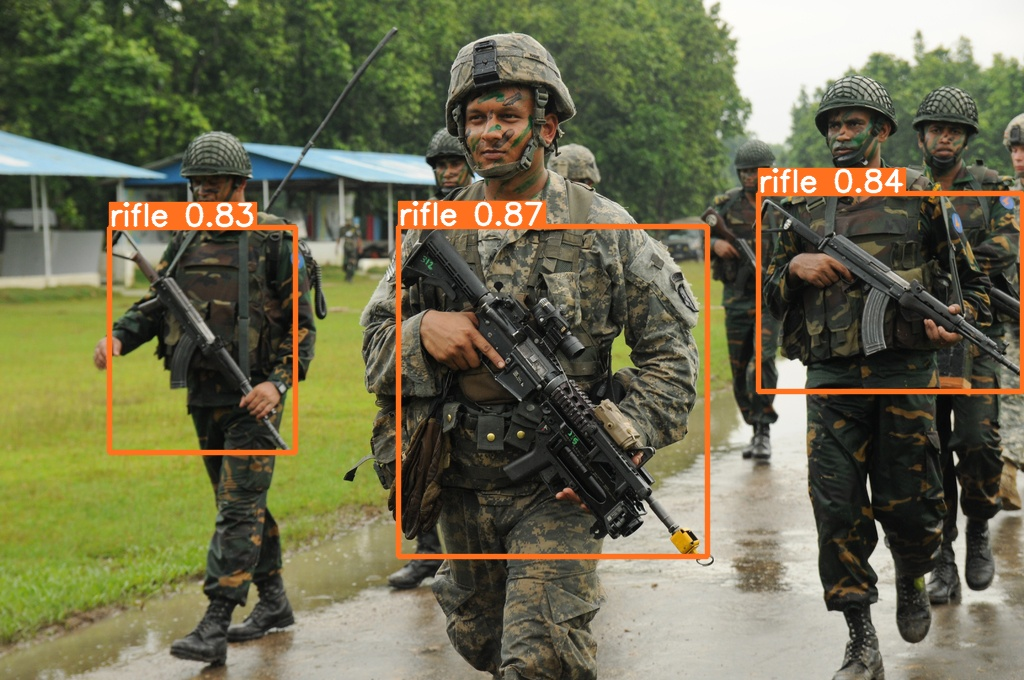

In [42]:
Image(filename="runs/detect/exp/01185f8322c3900c2.jpg", width=600)

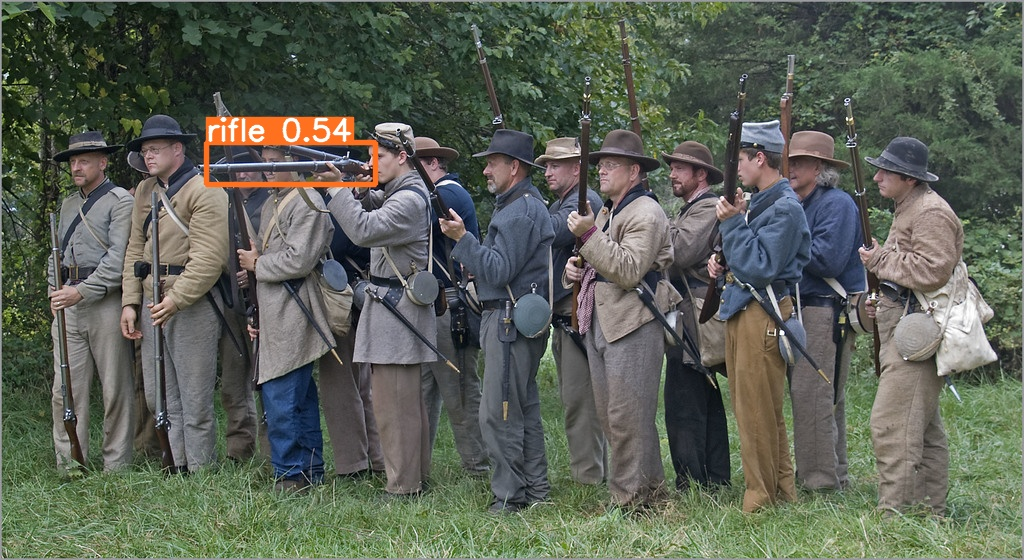

In [43]:
Image(filename="runs/detect/exp/0113a550eac4f838d.jpg", width=600)

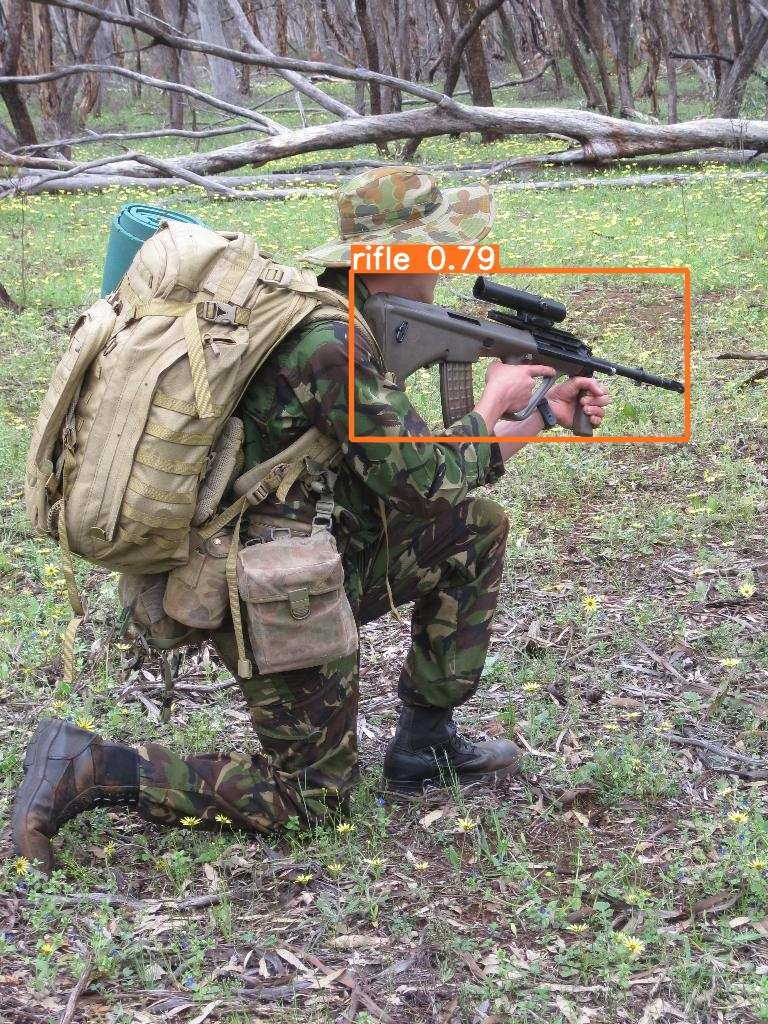

In [44]:
Image(filename="runs/detect/exp/112ef6bd3929ebf3e.jpg", width=600)

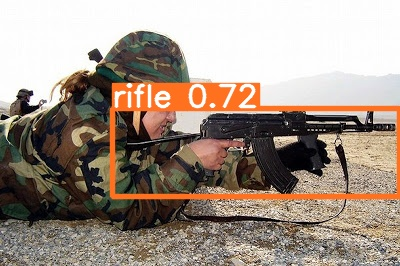

In [45]:
Image(filename='runs/detect/exp/i1mage13.jpg', width=600)

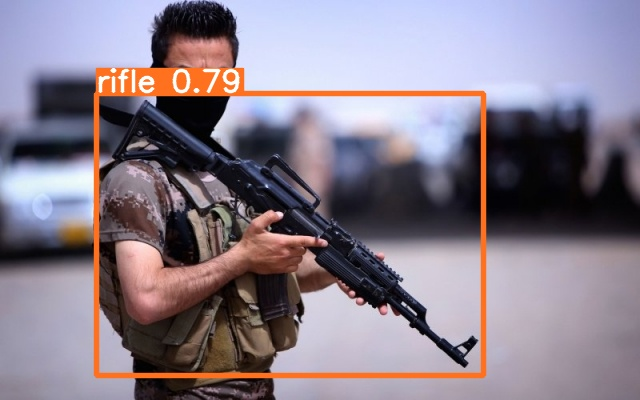

In [46]:
Image(filename='runs/detect/exp/i1mage20.jpg', width=600)

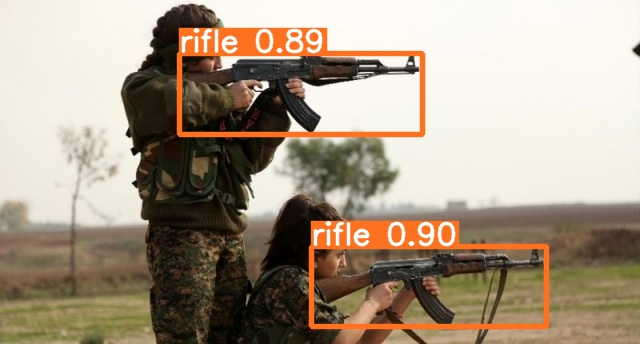

In [47]:
Image(filename='runs/detect/exp/i1mage21.jpg', width=600)